# <font color='red'>Examen Data Science</font>

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/st.jpeg?raw=1)

Escribir su Nombre y Apellido a continuación

Nombre: Brenda

Apellido: Martinez

# Sección A - Desafíos Técnicos

## <font color='red'>1 -Python</font>

### py-1) Vectores, Clases y Objetos

Desarrollar una clase en python que, al instanciar, reciba un vector **weights** y que tenga la siguiente funcionalidad:


* Desarrollar el método **set_weights** que pueda sobrescribir los valores del atributo `weights`
* Desarrollar el método **dot** que permita multiplicar el vector `weigths` por un vector de entrada. (producto escalar)
* Desarrollar el método **predict** que utilice la salida del método dot y lo pasé por la función ReLu. <a href=https://es.wikipedia.org/wiki/Rectificador_(redes_neuronales)>Función Relu</a>  
* Desarrollar otra clase que herede el comportamiento de la clase anterior y que además:
  * Reciba un parametro adicional: `bias` (int64)
  * Redefina el método **dot** y al producto le sume el atributo `bias`

In [39]:
import numpy as np
weights = np.array([-4,3,1,-2])

In [40]:
# Escriba aquí su respuesta
import numpy as np
class Base:

    def __init__(self, weights):
        self.set_weights(weights)

    def set_weights(self, weights):
        w = np.asarray(weights, dtype=np.float64).reshape(-1)
        if w.size == 0:
            raise ValueError("`weights` no puede estar vacío.")
        self.weights = w

    def dot(self, x):
        x_arr = np.asarray(x, dtype=np.float64).reshape(-1)
        if x_arr.shape != self.weights.shape:
            raise ValueError(
                f"Dimensiones incompatibles: weights={self.weights.size}, x={x_arr.size}"
            )
        return float(np.dot(self.weights, x_arr))

    @staticmethod
    def relu(z):
        return float(np.maximum(0.0, z))

    def predict(self, x):
        return self.relu(self.dot(x))

class WithBias(Base):

    def __init__(self, weights, bias):
        super().__init__(weights)
        try:
            self.bias = np.int64(bias)
        except Exception as e:
            raise TypeError("`bias` debe ser convertible a int64.") from e


    def dot(self, x):
        return float(super().dot(x) + int(self.bias))

### py-2) Unit test

Desarrollar un test unitario que permita evaluar los métodos de la clase base.

In [41]:
import unittest

class TestBase(unittest.TestCase):

    def setUp(self):
        self.weights = np.array([-4, 3, 1, -2], dtype=np.float64)
        self.x_ok = np.array([1.0, 2.0, 0.5, -1.0], dtype=np.float64)
        self.base = Base(self.weights)

    def test_set_weights_valido(self):
        new_weights = np.array([1, 2, 3, 4], dtype=np.float64)
        self.base.set_weights(new_weights)
        self.assertTrue(np.allclose(self.base.weights, new_weights))
        self.assertEqual(self.base.weights.dtype, np.float64)

    def test_set_weights_vacio(self):
        with self.assertRaises(ValueError):
            self.base.set_weights([])

    def test_set_weights_no_vector_1d(self):
        with self.assertRaises(ValueError):
            self.base.set_weights([[1, 2], [3, 4]])

    def test_dot_valor_correcto(self):
        resultado = self.base.dot(self.x_ok)
        self.assertAlmostEqual(resultado, 4.5)

    def test_dot_dimensiones_incompatibles(self):
        with self.assertRaises(ValueError):
            self.base.dot([1.0, 2.0])

    def test_predict_relu(self):
        pred = self.base.predict(self.x_ok)
        self.assertAlmostEqual(pred, 4.5)

    def test_relu_negativo(self):
        self.assertEqual(Base.relu(-5), 0.0)

    def test_relu_cero(self):
        self.assertEqual(Base.relu(0), 0.0)

    def test_relu_positivo(self):
        self.assertEqual(Base.relu(3.2), 3.2)


class TestWithBias(unittest.TestCase):

    def setUp(self):
        self.weights = np.array([-4, 3, 1, -2], dtype=np.float64)
        self.x = np.array([1.0, 2.0, 0.5, -1.0], dtype=np.float64)
        self.bias = 3
        self.unit = WithBias(self.weights, self.bias)

    def test_dot_suma_bias(self):
        resultado_base = Base(self.weights).dot(self.x)
        resultado_bias = self.unit.dot(self.x)
        self.assertAlmostEqual(resultado_bias, resultado_base + self.bias)

    def test_bias_es_int64(self):
        self.assertIsInstance(self.unit.bias, np.int64)

    def test_predict_con_bias(self):
        pred = self.unit.predict(self.x)
        self.assertAlmostEqual(pred, 7.5)


unittest.main(argv=[''], exit=False)


......F..EEsE...
ERROR: test_add (__main__.TestCalculator.test_add)
Test case function for addition
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1315066369.py", line 6, in test_add
    self.calc = Calculator()
                ^^^^^^^^^^
NameError: name 'Calculator' is not defined

ERROR: test_div (__main__.TestCalculator.test_div)
Test case function for division
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1315066369.py", line 28, in test_div
    self.calc = Calculator()
                ^^^^^^^^^^
NameError: name 'Calculator' is not defined

ERROR: test_sub (__main__.TestCalculator.test_sub)
Test case function for subtraction
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipython-input-1315066369.py", line 13, in test_sub
    self.calc = Calc

## <font color='red'>2- SQL</font>

Para el siguiente ejercicio se tiene una base de datos que tiene el siguiente DER:

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/img_der.png?raw=1)


* Persona (id) puede tener muchas Tarjetas (se relaciona a través de `id_titular`)
* Una Compra siempre es realizada con una única tarjeta
* (EXTRA) La tabla Compra posee un histórico de más de 10 años y varias decenas de millones de registros por lo que las consultas a esta entidad pueden tardar varios minutos si no están correctamente optimizadas.

### sql-1) Query

Obtener los número de tarjeta que no tengan consumos en el último mes pero que pertenecen a personas que hayan comprado al menos un total de $5000 en el último mes en los rubros (FARMACIA y SUPERMERCADOS) en conjunto. (Si es posible, tener en cuenta el punto EXTRA mencionado previamente).


In [ ]:
# Escriba aquí su respuesta

SELECT t.nro_tarjeta
FROM Tarjeta t
JOIN (
  SELECT t2.id_titular
  FROM Compra c2
  JOIN Tarjeta t2 USING (nro_tarjeta)
  WHERE c2.fecha_compra >= DATE_SUB(CURDATE(), INTERVAL DAYOFMONTH(CURDATE())-1 DAY) - INTERVAL 1 MONTH
    AND c2.fecha_compra <  DATE_SUB(CURDATE(), INTERVAL DAYOFMONTH(CURDATE())-1 DAY)
    AND c2.rubro IN ('FARMACIA', 'SUPERMERCADOS')
  GROUP BY t2.id_titular
  HAVING SUM(c2.monto) >= 5000
) spenders
  ON spenders.id_titular = t.id_titular
WHERE NOT EXISTS (
  SELECT 1
  FROM Compra c
  WHERE c.nro_tarjeta = t.nro_tarjeta
    AND c.fecha_compra >= DATE_SUB(CURDATE(), INTERVAL DAYOFMONTH(CURDATE())-1 DAY) - INTERVAL 1 MONTH
    AND c.fecha_compra <  DATE_SUB(CURDATE(), INTERVAL DAYOFMONTH(CURDATE())-1 DAY)
)

### sql-2) Explicar el resultado de la siguiente query

* ¿Qué se obtiene cómo resultado?
* ¿Quiénes son P1, P2 y P3?
* (EXTRA) Si supiera que la tabla persona se carga completa todos los días del año, cada día teniendo una foto guardada con una valor distinto dentro de una variable llamada partition_date. Por ej: uno puede consultar todos los ids de la fecha 2021-05-27 o de la fecha que quiera. ¿Cambiaría algo la siguiente query si quisiera obtener el mismo resultado para la última fecha disponible?


 <font color='blue'>**SELECT**</font> P1.dni,  <font color='red'>COUNT</font> ( <font color='red'>DISTINCT</font>  ( P2.id ) )\
<font color='blue'>**FROM** </font> Persona P1 \
<font color='blue'>**JOIN**</font> Persona P2 on P1.id_padre = P2.id \
<font color='blue'>**JOIN**</font>  Persona P3 on P2.id_padre = P3.id \
<font color='blue'>**WHERE**</font>  P3.sexo = 'MASCULINO' \
<font color='blue'>**GROUP BY**</font>  P1.dni

In [ ]:
# Escriba aquí su respuesta
1- Devuelve el dni de todas las Personas 1 y el conteo de dni unicos del padre de la Persona 2 que sean del sexo masculino (Personas cuyo abuelo paterno es hombre)
2- P1 podria representar a un nieto, P2 podria representar al padre y P3 podria representar al abuelo

Punto extra

In [ ]:
SELECT P1.dni, COUNT(DISTINCT P2.id)
FROM Persona P1
JOIN Persona P2 ON P1.id_padre = P2.id
JOIN Persona P3 ON P2.id_padre = P3.id
WHERE P1.partition_date = (
        SELECT MAX(partition_date) FROM Persona
      )
  AND P2.partition_date = P1.partition_date
  AND P3.partition_date = P1.partition_date
  AND P3.sexo = 'MASCULINO'
GROUP BY P1.dni

Podemos ver que la "foto" almacena la fecha de la ultima actualizacion de ese registro. Por lo tanto la tabla permitiria guardar datos historicos de la Persona. Es una manera de hacer un versionado de manera logica.
Debida a esta logica implementada hay que tener mucho cuidado al realizar consultas y especificar claramente sobre que fecha se quiere el dato ya que podriamos estan leyendo multiples datos o datos desactualizados.

# Sección B - Desafío Machine Learning

#### Enunciado Parte Práctica

El ejercicio consiste en realizar una clasificación de intención de compra online. Para ello se dispondrá de un dataset **online_shoppers_intention.csv** el cual consta de **12.330** registros y **18** columnas
* El target es la columnna **Revenue**

Para completar el desafío se deberá:
* Realizar un análisis exploratorio de los datos
* Explicar la elección del algoritmo utilizado
* Explicar los resultados obtenidos (Métricas)
* Explicar cuales son las variables que más afectan a la predicción.
* Contestar las siguientes preguntas:
  * *¿El modelo final elegido es bueno? Justificar*
  * *¿Existe overfitting o underfitting?*

⚠️**ACLARACIONES:**⚠️

- Se tendrá en cuenta la prolijidad del informe.
- Se tendrá en cuenta la legibilidad del código.
- De ser necesario, dejar asentado los supuestos utilizados por escrito.

### Analisis exploratorio de datos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

### Primer aproach a los datos

In [ ]:
## Lectura del data set y muestreo

df = pd.read_csv("https://raw.githubusercontent.com/martinezbrenda/Test_Ingreso_Santander/main/online_shoppers_intention.csv")
# Inspección rápida de las primeras filas, columnas y tamano
print("Total filas:", df.shape[0])
print("Total columnas:", df.shape[1])
df.head(6)

Total filas: 12330
Total columnas: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [ ]:
# Estructura del DataFrame para ver tipos y cantidades

print("\nEstructura:")
print(df.info())

print("\nResumen estadistico")
print(df.describe())


Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTy

Podemos observar que tenemos 4 tipos de variables que se reparten en 7 int 7 float 2 object y 2 bool.

,proportion
Revenue,
False,0.845255
True,0.154745


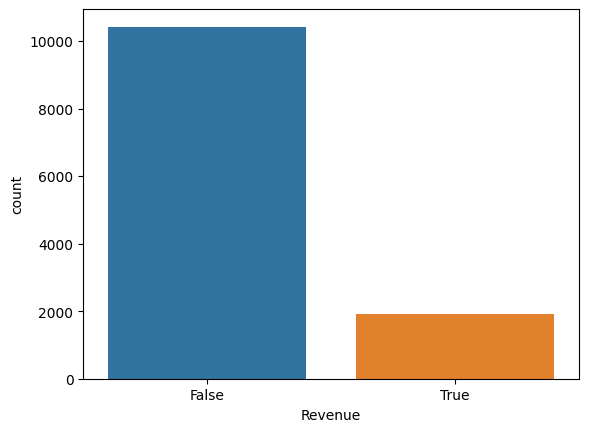

In [ ]:
# Distribucion de la variable target

sns.countplot(x='Revenue', data=df, hue='Revenue', legend=False)
df['Revenue'].value_counts(normalize=True)

Se puede ver que el data set esta altamente desbalanceado, tendremos que analizar que metricas conviene utilizar para la evaluacion del modelo y conciderar un posible rebalanceo

### Tranformacion de variables
Luego de las observaciones realizadas anteriormente vamos a analizar como modificar ciertas columnas para estas puedan ser utilizadas. Estas son:


*   Weekend
*   VisitorType
*   Month
* Revenue




In [ ]:
print(df['VisitorType'].unique())
df.VisitorType.value_counts()

['Returning_Visitor' 'New_Visitor' 'Other']


,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


Podemos observar que visitor type no es una variable binaria, pero debido a que la categoria "Other" tiene muy pocos registros, la eliminaremos y concideraremos unicamente si el visitante es nuevo o recurrente.

In [ ]:
df['VisitorType'] = df['VisitorType'].apply( lambda x: x if x in ['Returning_Visitor', 'New_Visitor'] else 'New_Visitor')
df['VisitorType'] = df['VisitorType'].apply(lambda x: 0 if x == 'Returning_Visitor' else 1)
print(df['VisitorType'].unique())
df.VisitorType.value_counts()

[0 1]


,count
VisitorType,
0,10551
1,1779


Convertimos a las columnas Weekend y Revenue en int

In [ ]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

Ahora modificaremos la columna Month para que deje de ser del tipo string.

In [ ]:
print(df['Month'].unique()) # Tenemos que ver como este data set tiene los meses escritos porque si no el mapeo no va a funcionar y va a dejar la columna Month con valores en nulo
month_map = {
    'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
    'Nov': 11, 'Dec': 12
}
df['Month'] = df['Month'].map(month_map)

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [ ]:
df.TrafficType.value_counts()

,count
TrafficType,
2,3913
1,2451
3,2052
4,1069
13,738
10,450
6,444
8,343
5,260


Podemos observar que tenemos demasiados tipos de trafico y muchos de ellos ni quiera tienen una cantidad significativa de registros asociados. Ahora procederemos a buscar los 10 mas frecuentes (ya que son 10 las categorias que superan los 200 registros) y reemplazar a todos los que no pertenezcan a ese top por la categoria "Other"

In [ ]:
top10= df.TrafficType.value_counts().index[:10]
df['TrafficType']= np.where(df['TrafficType'].isin(top10), df['TrafficType'], 0)
df.TrafficType.value_counts()

,count
TrafficType,
2,3913
1,2451
3,2052
4,1069
13,738
10,450
6,444
0,363
8,343


In [ ]:
df.Browser.value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
3,105
13,61


De la misma manera que en el caso anterior, vamos a realizar lo mismo con la variable Browser

In [ ]:
top5 = df['Browser'].value_counts().index[:5]
df['Browser'] = np.where(df['Browser'].isin(top5), df['Browser'], 0)
df.Browser.value_counts()

,count
Browser,
2,7961
1,2462
4,736
0,530
5,467
6,174


In [ ]:
df.OperatingSystems.value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
4,478
8,79
6,19
7,7
5,6


In [ ]:
top3 = df['OperatingSystems'].value_counts().index[:3]
df['OperatingSystems'] = np.where(df['OperatingSystems'].isin(top3), df['OperatingSystems'], 0)
df.OperatingSystems.value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
0,589


Al contabilizar el contenido del resto de las columnas no concideramos necesario realizar modificaciones en este momento ahora verificaremos las modifcaciones realizadas

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,0,1,4,0,1,0


### Busca de valores faltantes o atipicos
Analizaremos el data set en busca de nulos y outliers

In [ ]:
# Valores nulos
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Observarmos que no se presentan valores nulos lo cual a priori puede parecer extrano pero una vez avanzado el EDA comprendemos que por la naturaleza del problema podria ser veridico

Analizamos las distribuciones de las variables

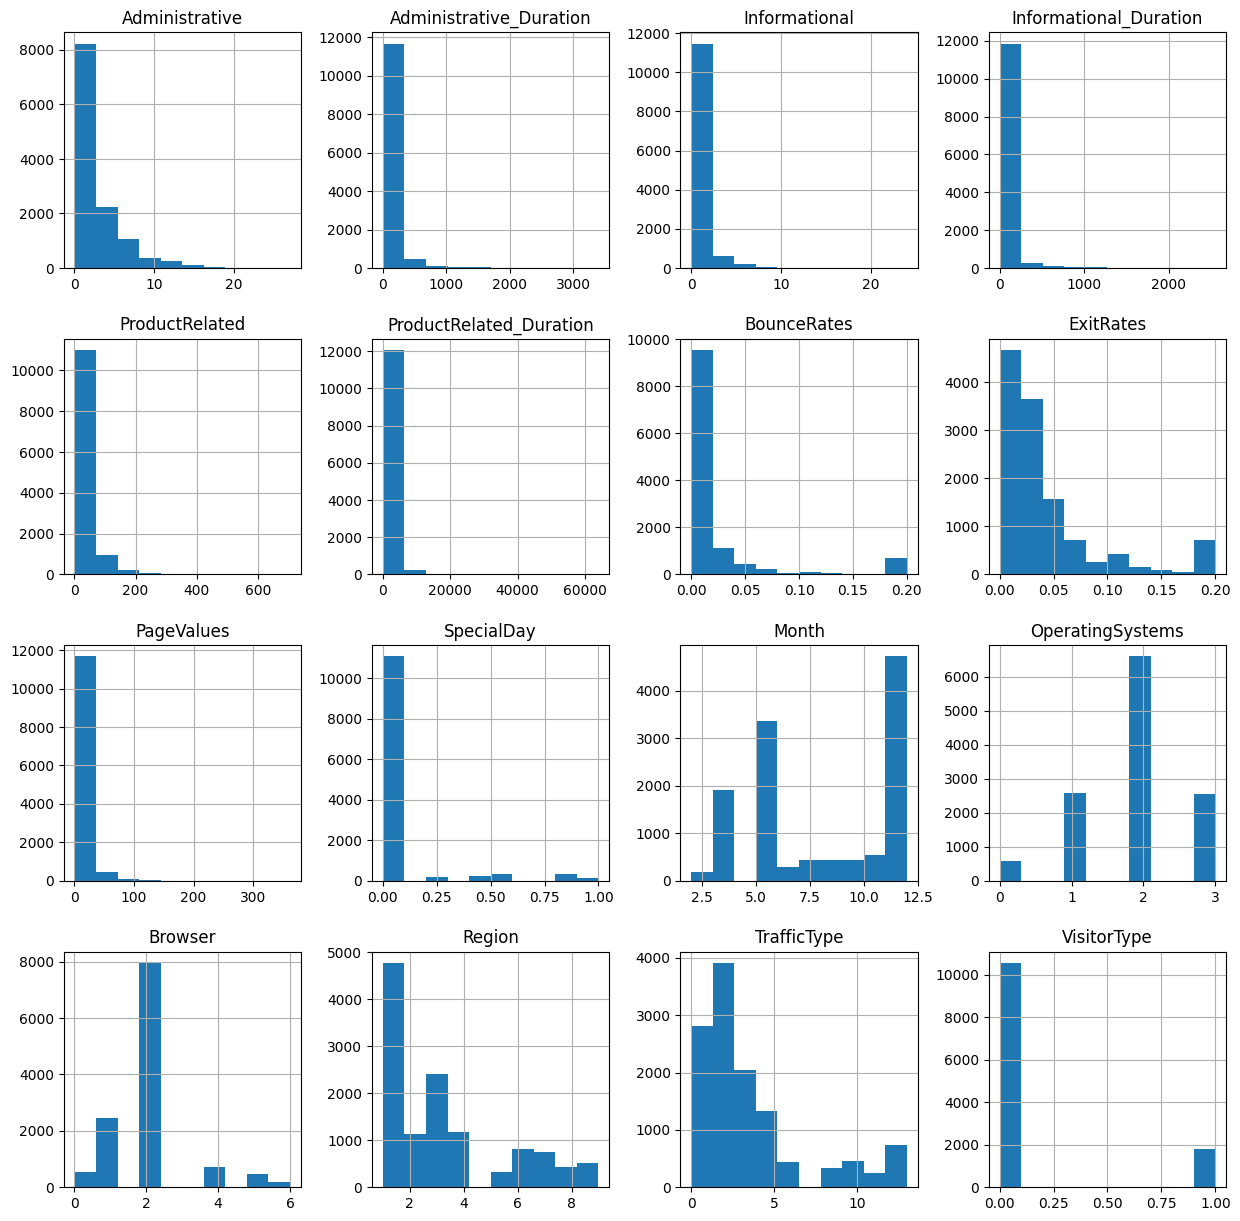

In [ ]:
df.iloc[:,:-2].hist(figsize=(15,15));

Podemos ver que se presentan outliers, procedemos a identificarlos

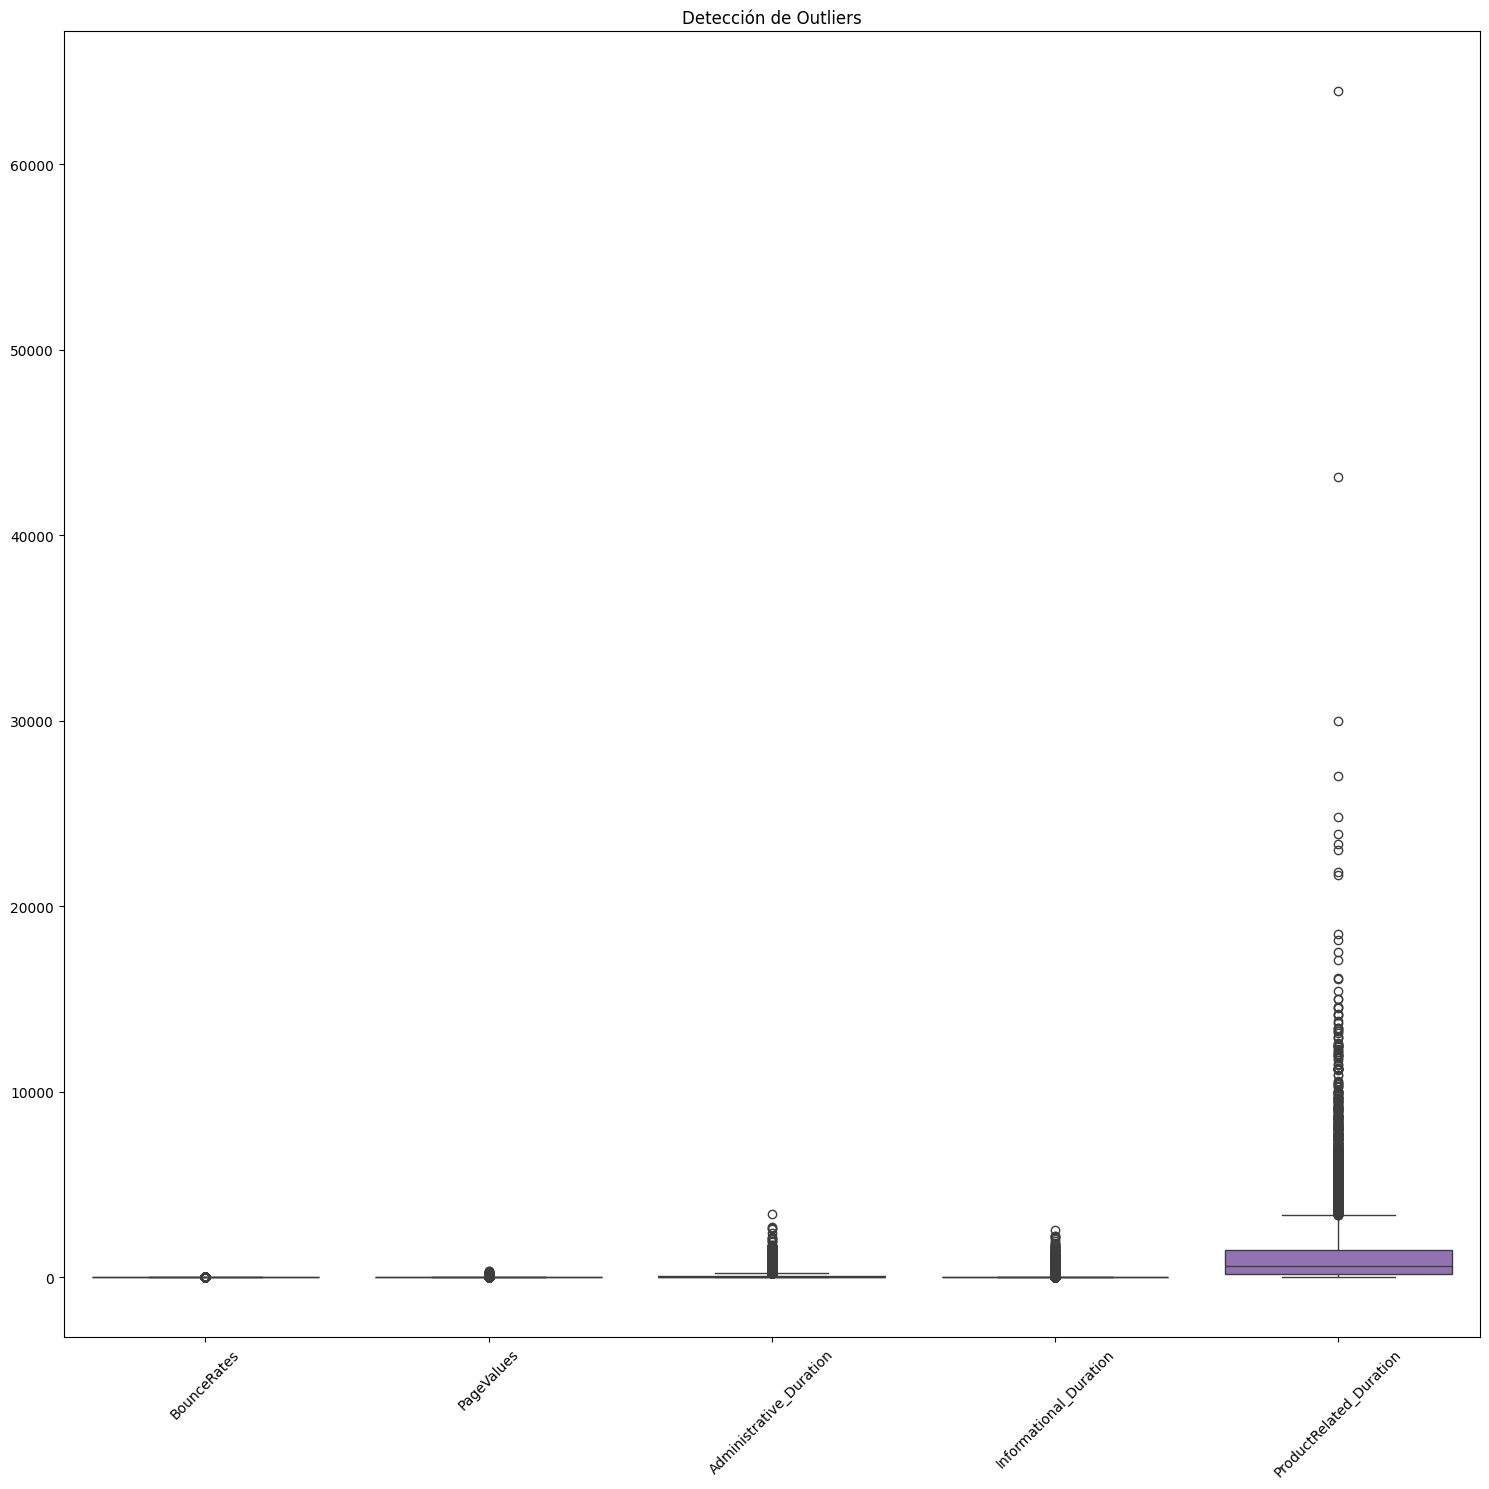

In [ ]:
cols_outliers = ['BounceRates', 'PageValues', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
plt.figure(figsize=(15, 15))
sns.boxplot(data=df[cols_outliers])
plt.title('Detección de Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
outlier_summary = {}
# Solo columnas int64 o float64, tuve que agregar la condicion df[col].nunique() > 2 porque no filtraba los varoles booleanos
numeric_cols = [col for col in df.columns if df[col].dtype in [np.int64, np.float64] and df[col].nunique() > 2]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Cantidad de outliers'])
outlier_df = outlier_df.sort_values(by='Cantidad de outliers', ascending=False)

outlier_df

,Cantidad de outliers
Browser,4369
PageValues,2730
Informational,2631
Informational_Duration,2405
TrafficType,1778
BounceRates,1551
SpecialDay,1251
Administrative_Duration,1172
ExitRates,1099
ProductRelated,987


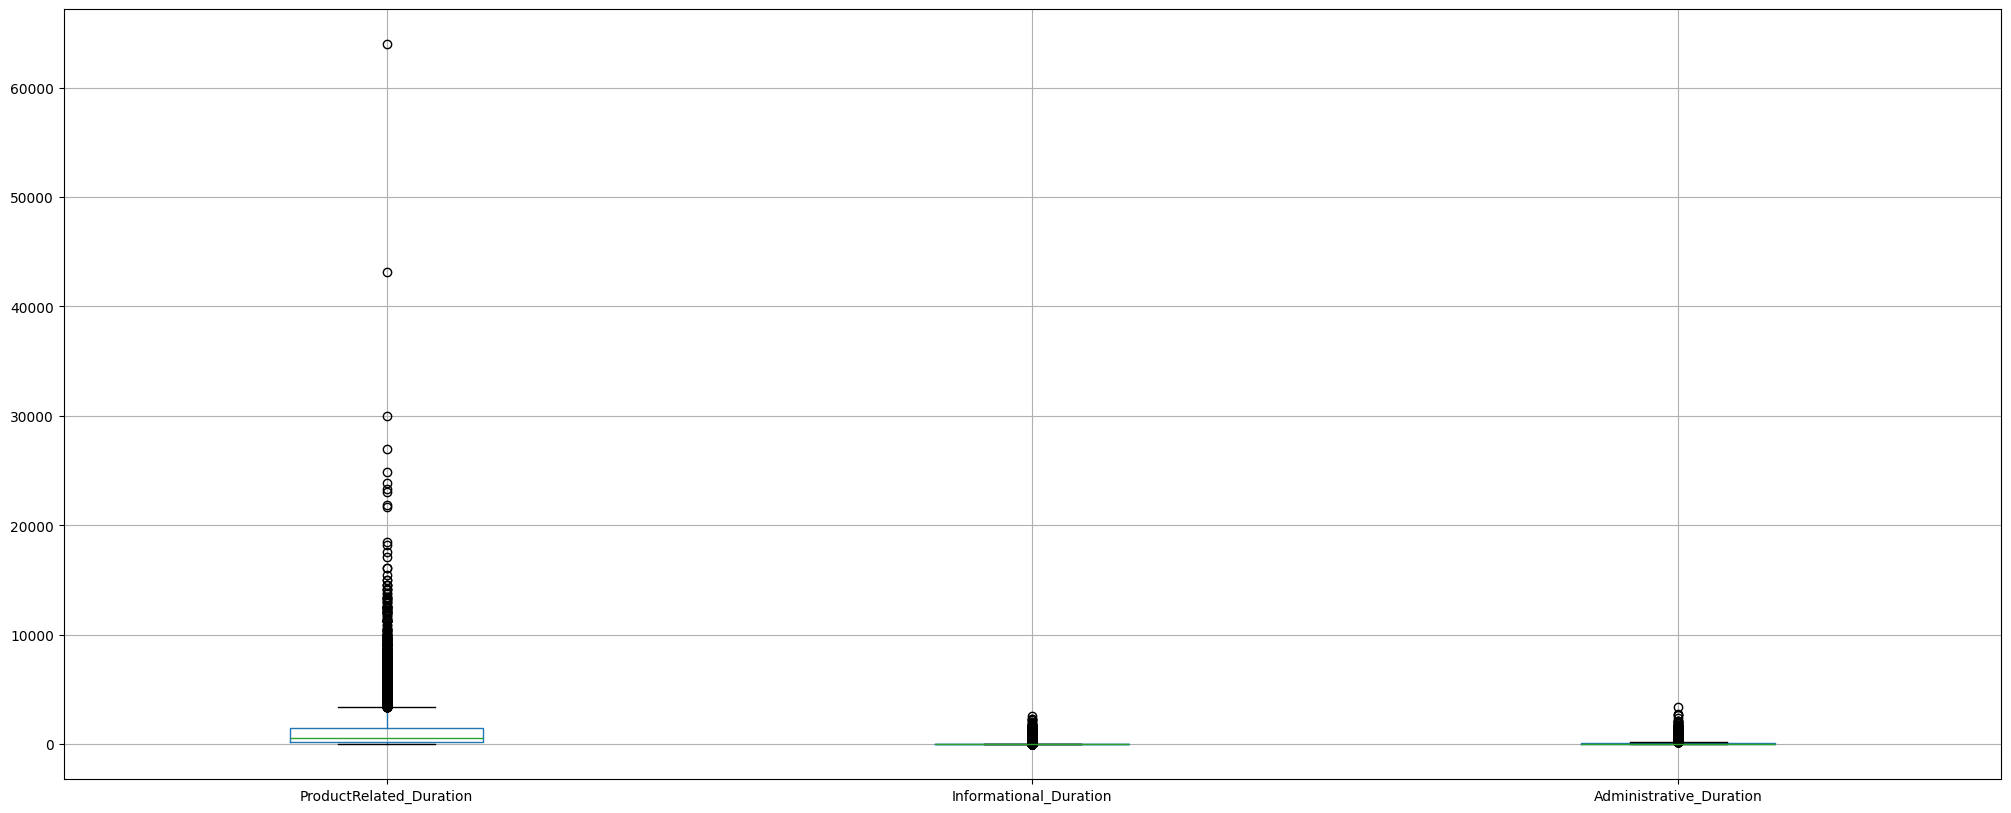

In [ ]:
df[['ProductRelated_Duration', 'Informational_Duration', "Administrative_Duration"]].boxplot(figsize=(25,10));

Segun lo que observamos
* PageValues: Fuerte asimetría, lo que puede ser común porque tiene muchos ceros (personas que ni llegan al checkout del carrito de compras) y algunos valores muy altos (que reflejan un interes en la compra). No conviene eliminar estos outliers, ya que son datos relevantes.

* BounceRates y ExitRates: Hay algunos valores extremos, pero estos porcentajes extremos son relevantes para el comportamiento del usuario y nos arriesgamos a perder ejemplos significativos.

* SpecialDay: Esta columna ya está muy dispersa por diseño (días especiales codificados en 0-1).

* VisitorType, Weekend, Revenue: Marcados como outliers por IQR por ser binarios pero no deben ser modificadas

* ProductRelated_Duration: Podemos ver en los graficos que muestra muchos valores por encima

Decidimos conservar los outliers para:
* Preservar el comportamiento real
* No incrementar el desbalance de la variable target.
* Evitar perdida de informacion


### Corelacion entre variables
Luego de las observaciones realizadas anteriormente vamos a analizar si contamos con columnas que pueden ser eliminadas o modificadas para ser de mayor provecho. Estas son:


*   OperatingSystems
*   Browser
*   Region
*   TrafficType
*   Informational vs Informational_Duration
*   ProductRelated vs ProductRelated_Duration
*   Administrative vs Administrative_Duration
*   VisitorType
*   Month


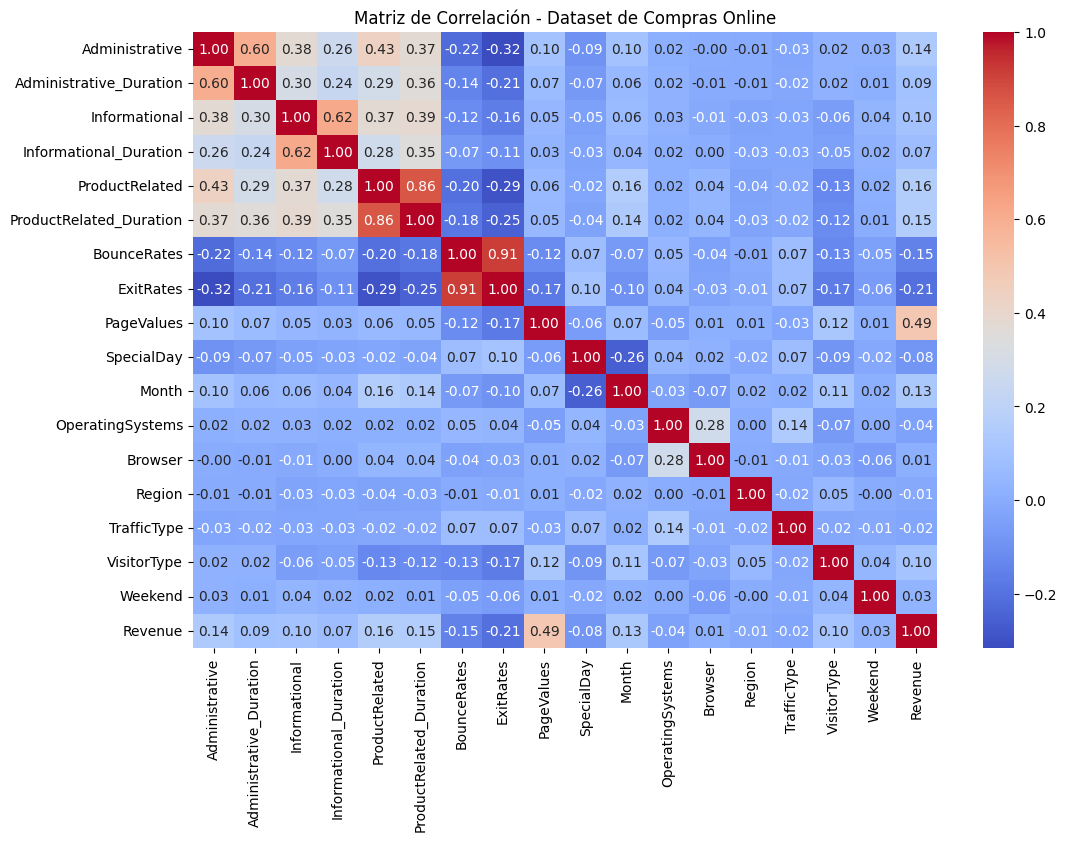

In [ ]:
# analizamos que varibles son realmente utiles
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset de Compras Online")
plt.show()

In [ ]:
corr_with_target = df.corr()['Revenue'].sort_values(ascending=False)
print("Correlación con la variable Revenue:")
print(corr_with_target.to_frame())

Correlación con la variable Revenue:
                          Revenue
Revenue                  1.000000
PageValues               0.492569
ProductRelated           0.158538
ProductRelated_Duration  0.152373
Administrative           0.138917
Month                    0.127372
VisitorType              0.103843
Informational            0.095200
Administrative_Duration  0.093587
Informational_Duration   0.070345
Weekend                  0.029295
Browser                  0.011932
Region                  -0.011595
TrafficType             -0.023640
OperatingSystems        -0.039447
SpecialDay              -0.082305
BounceRates             -0.150673
ExitRates               -0.207071


Con la informacion que el heatmap nos presenta podemos justificar la eliminacion de ciertas columnas.
Como por ejemplo:
* Administrative ya que contiene informacion menos valiosa que Administrative_Duration. De manera que si administrative esta en cero sabemos que adminsitrative_duration tambien lo va a estar y en caso de que no sean cero, la informacion que vamos a usar va a estar en duration no en administrative. Lo mismo para Informational y para product related
* Columnas como OperatingSystems, Browser, Region, SpecialDay y TrafficType tienen muy baja correlación y no aportan informacion directa #####################Chequear con random Forest igual
* Bounce rates con Exit Rates

In [ ]:
#analisis con random forest y regresion logistica sobre si es contraproducente o no eliminar esas columnas
sets = {
    "set_a": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'ExitRates']),
    "set_b": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Region', 'TrafficType']),
    "set_c": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType']),
    "set_d": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates']),
    "set_e": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates', 'OperatingSystems'])
}

results = {}

In [ ]:
 for name, dataset in sets.items():
    X = dataset.drop(columns='Revenue')
    y = dataset['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    rf_base = RandomForestClassifier(random_state=42)
    rf_base.fit(X_train, y_train)
    y_pred_rf = rf_base.predict(X_test)
    y_proba_rf = rf_base.predict_proba(X_test)[:, 1]
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
    rf_auc = roc_auc_score(y_test, y_proba_rf)

    param_dist = {
        'n_estimators': [100, 150, 200, 300],
        'max_depth': [None, 8, 10, 12, 16],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }
    rf_rs = RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_distributions=param_dist,
        n_iter=20, scoring='f1', cv=3, n_jobs=-1, random_state=42, verbose=0
    )
    rf_rs.fit(X_train, y_train)
    rf_best = rf_rs.best_estimator_
    y_pred_rft = rf_best.predict(X_test)
    y_proba_rft = rf_best.predict_proba(X_test)[:, 1]
    rft_report = classification_report(y_test, y_pred_rft, output_dict=True)
    rft_auc = roc_auc_score(y_test, y_proba_rft)

    pipe_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipe_lr.fit(X_train, y_train)
    y_pred_lr = pipe_lr.predict(X_test)
    y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]
    lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
    lr_auc = roc_auc_score(y_test, y_proba_lr)

    results[name] = {
        "RF Base": {
            "precision": rf_report["1"]["precision"], "recall": rf_report["1"]["recall"],
            "f1-score": rf_report["1"]["f1-score"], "roc_auc": rf_auc
        },
        "RF RandomizedSearchCV": {
            "precision": rft_report["1"]["precision"], "recall": rft_report["1"]["recall"],
            "f1-score": rft_report["1"]["f1-score"], "roc_auc": rft_auc,
            "best_params": rf_rs.best_params_
        },
        "Logistic Regression": {
            "precision": lr_report["1"]["precision"], "recall": lr_report["1"]["recall"],
            "f1-score": lr_report["1"]["f1-score"], "roc_auc": lr_auc
        }
    }


results_df = pd.DataFrame({
    (model, metric): {k: v[model][metric] for k, v in results.items()}
    for model in ["RF Base", "RF RandomizedSearchCV", "Logistic Regression"]
    for metric in ["precision", "recall", "f1-score", "roc_auc"]
})

results_df

RF Base                               RF RandomizedSearchCV            \
      precision    recall  f1-score   roc_auc             precision    recall   
set_a  0.716783  0.536649  0.613772  0.915180              0.600849  0.740838   
set_b  0.698997  0.547120  0.613803  0.914500              0.603070  0.719895   
set_c  0.698675  0.552356  0.616959  0.914079              0.605263  0.722513   
set_d  0.698052  0.562827  0.623188  0.913085              0.604301  0.735602   
set_e  0.690852  0.573298  0.626609  0.908839              0.603939  0.722513   

                          Logistic Regression                                
       f1-score   roc_auc           precision    recall  f1-score   roc_auc  
set_a  0.663540  0.923721            0.726190  0.319372  0.443636  0.876324  
set_b  0.656325  0.924849            0.736842  0.329843  0.455696  0.868507  
set_c  0.658711  0.923393            0.735294  0.327225  0.452899  0.868449  
set_d  0.663518  0.925449            0.735294  0.327225  0.452899  0.877804  
set_e  0.657926  0.925920            0.733728  0.324607  0.450091  0.877924

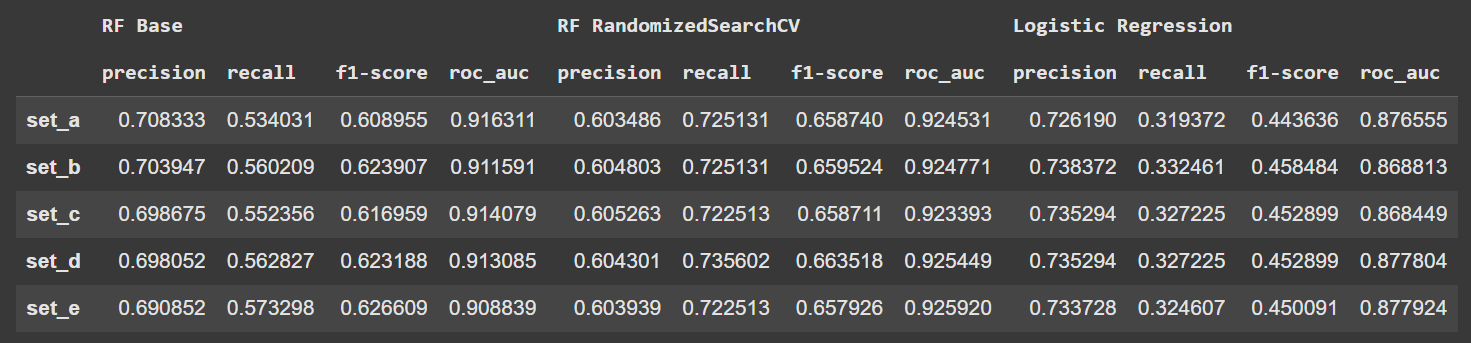Estas metricas representan:
* Precision: De los que predije como compra, cuantos realmente compraron?
* Recall: De todos los que realmente compraron, cuantos identifique?
* F1-score: Promedio balanceado entre precision y recall
* ROC AUC: que tan bien el modelo separa las clases 0 y 1

**CONCLUSIONES**

* RF Base vs RF RandomizedSearchCV
	- En todos los set, el RF RandomizedSearchCV supera al RF Base en recall y F1, con un ROC AUC mayor.
	- RF Base tiene mayor precisión, pero a costa de perder compradores (bajo recall).
* RF RandomizedSearchCV F1-Score tiene el valor mas alto junto con el set_a. Esta es la metrica más equilibrada para este caso desbalanceado

* ROC AUC el set_d y set_e son los más altos (0.9254 y 0.9259).

* Regresion logistica F1 es mucho más bajo (0.44–0.45) y recall pésimo (~0.32). Aunque la precisión es alta (~0.73), es demasiado bajo el recall por lo que deja escapar la mayoría de compradores.

Conclusion elejimos RF RandomizedSearchCV con set_d porque:
- Tiene el balance ideal:
  * F1 = 0.6635 (empatado como el mejor con set_a).
  * Recall = 0.7356 (mejor que set_a).
  * ROC AUC = 0.9254 (muy alto y cercano al máximo).
  * Dimensión de features:
    - set_d es más reducido que set_a (elimina más columnas poco relevantes) y los modelos más simples generalizan mejor y son más interpretables.

  * RF RandomizedSearchCV > RF Base: mejora el recall un 20–25% con F1 estable
  * Regresion logistica queda descartado: bajo recall y F1.

In [ ]:
columns_to_drop= ['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates']
df = df.drop(columns=columns_to_drop)

print("Columnas finales para el modelo:")
df.columns

Columnas finales para el modelo:


Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay',
       'Month', 'OperatingSystems', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

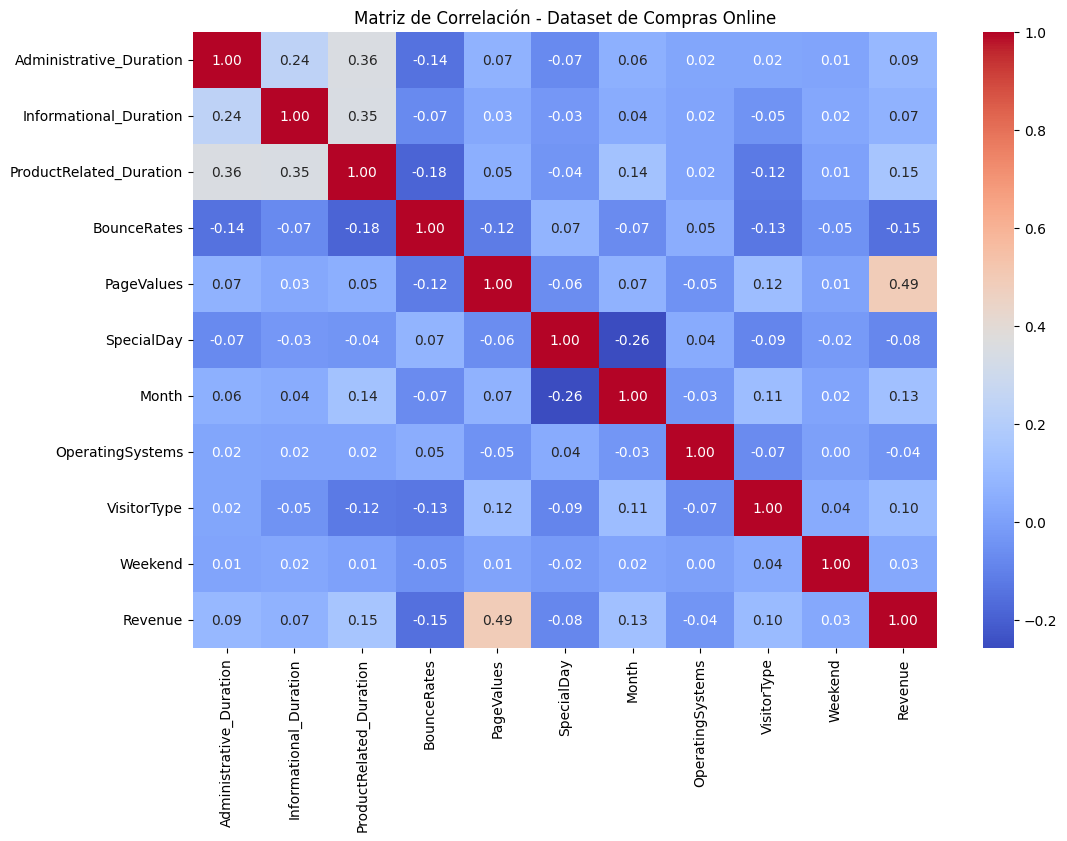

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset de Compras Online")
plt.show()

In [ ]:
corr_with_target = df.corr()['Revenue'].sort_values(ascending=False)
print("Correlación con la variable Revenue:")
print(corr_with_target.to_frame())

Correlación con la variable Revenue:
                          Revenue
Revenue                  1.000000
PageValues               0.492569
ProductRelated_Duration  0.152373
Month                    0.127372
VisitorType              0.103843
Administrative_Duration  0.093587
Informational_Duration   0.070345
Weekend                  0.029295
OperatingSystems        -0.039447
SpecialDay              -0.082305
BounceRates             -0.150673


### Modelado

In [ ]:
df_final = sets["set_d"]
X, y = df_final.drop(columns="Revenue"), df_final["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

best_params = results["set_d"]["RF RandomizedSearchCV"]["best_params"].copy()
for k in ("n_estimators", "max_samples"):
    best_params.pop(k, None)

rf_final = RandomForestClassifier(n_estimators=200, random_state=42, **best_params)
rf_final.fit(X_train, y_train)

y_pred = rf_final.predict(X_test)
y_proba = rf_final.predict_proba(X_test)[:, 1]

print("\nModelo final RF RandomizedSearchCV con set_d\n")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix [[TN, FP], [FN, TP]]:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


Modelo final RF RandomizedSearchCV con set_d

              precision    recall  f1-score   support

           0     0.9495    0.9117    0.9302      2084
           1     0.6043    0.7356    0.6635       382

    accuracy                         0.8844      2466
   macro avg     0.7769    0.8237    0.7969      2466
weighted avg     0.8960    0.8844    0.8889      2466

Confusion Matrix [[TN, FP], [FN, TP]]:
 [[1900  184]
 [ 101  281]]
ROC AUC: 0.9254


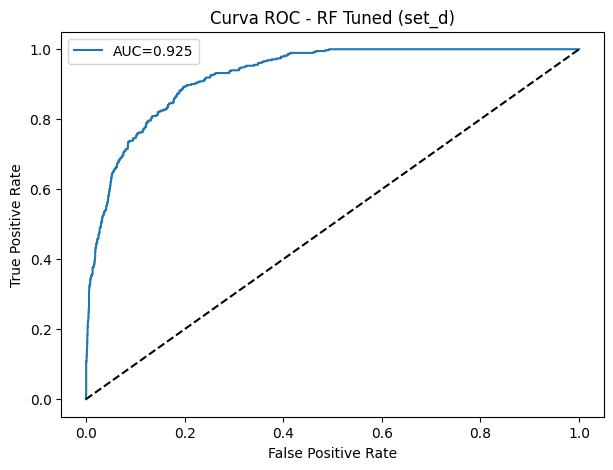

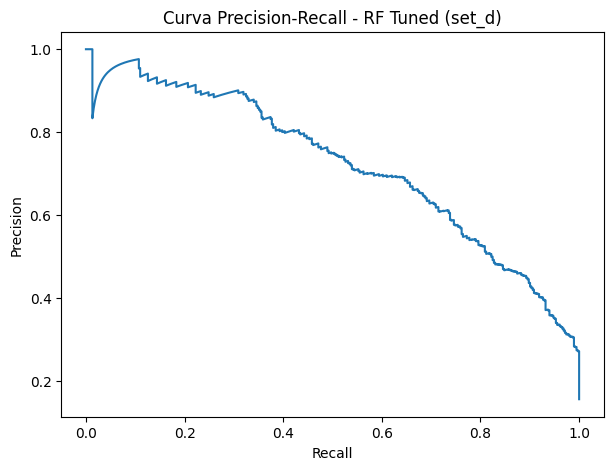

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
prec, rec, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Curva ROC - RF Tuned (set_d)"); plt.legend(); plt.show()

plt.figure(figsize=(7,5))
plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Curva Precision-Recall - RF Tuned (set_d)")
plt.show()

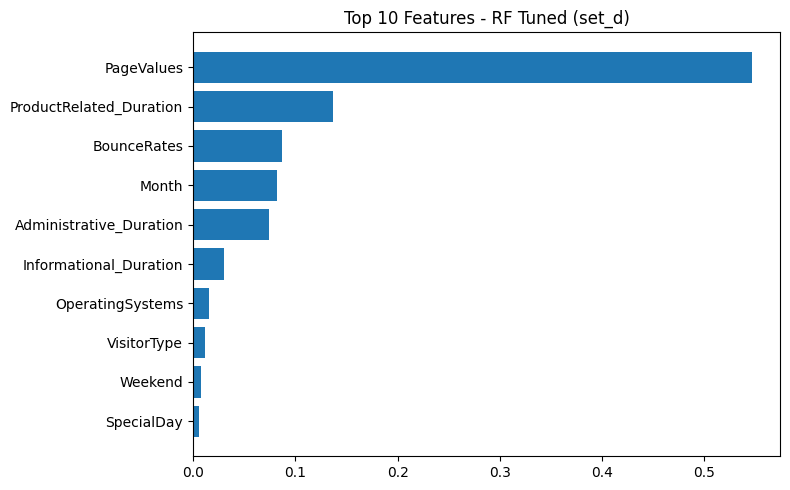

In [ ]:
imp = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_final.feature_importances_
}).sort_values("importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(imp["feature"].head(10)[::-1], imp["importance"].head(10)[::-1])
plt.title("Top 10 Features - RF Tuned (set_d)")
plt.tight_layout(); plt.show()

Este grafico indica que podriamos reducir aun mas el nro de columnas

In [ ]:
sets2 = {
    "set_f": df.drop(columns=['SpecialDay','Weekend']),
    "set_g": df.drop(columns=['VisitorType', 'OperatingSystems']),
    "set_h": df.drop(columns=['VisitorType', 'OperatingSystems', 'SpecialDay','Weekend']),
}

results2 = {}

In [ ]:
for name, dataset in sets2.items():
    X = dataset.drop(columns='Revenue')
    y = dataset['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    rf_base = RandomForestClassifier(random_state=42)
    rf_base.fit(X_train, y_train)
    y_pred_rf = rf_base.predict(X_test)
    y_proba_rf = rf_base.predict_proba(X_test)[:, 1]
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
    rf_auc = roc_auc_score(y_test, y_proba_rf)

    param_dist = {
        'n_estimators': [100, 150, 200, 300],
        'max_depth': [None, 8, 10, 12, 16],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }
    rf_rs = RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_distributions=param_dist,
        n_iter=20, scoring='f1', cv=3, n_jobs=-1, random_state=42, verbose=0
    )
    rf_rs.fit(X_train, y_train)
    rf_best = rf_rs.best_estimator_
    y_pred_rft = rf_best.predict(X_test)
    y_proba_rft = rf_best.predict_proba(X_test)[:, 1]
    rft_report = classification_report(y_test, y_pred_rft, output_dict=True)
    rft_auc = roc_auc_score(y_test, y_proba_rft)

    pipe_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipe_lr.fit(X_train, y_train)
    y_pred_lr = pipe_lr.predict(X_test)
    y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]
    lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
    lr_auc = roc_auc_score(y_test, y_proba_lr)

    results2[name] = {
        "RF Base": {
            "precision": rf_report["1"]["precision"], "recall": rf_report["1"]["recall"],
            "f1-score": rf_report["1"]["f1-score"], "roc_auc": rf_auc
        },
        "RF RandomizedSearchCV": {
            "precision": rft_report["1"]["precision"], "recall": rft_report["1"]["recall"],
            "f1-score": rft_report["1"]["f1-score"], "roc_auc": rft_auc,
            "best_params": rf_rs.best_params_
        },
        "Logistic Regression": {
            "precision": lr_report["1"]["precision"], "recall": lr_report["1"]["recall"],
            "f1-score": lr_report["1"]["f1-score"], "roc_auc": lr_auc
        }
    }


results2_df = pd.DataFrame({
    (model, metric): {k: v[model][metric] for k, v in results.items()}
    for model in ["RF Base", "RF RandomizedSearchCV", "Logistic Regression"]
    for metric in ["precision", "recall", "f1-score", "roc_auc"]
})

results2_df

RF Base                               RF RandomizedSearchCV            \
      precision    recall  f1-score   roc_auc             precision    recall   
set_f  0.706070  0.578534  0.635971  0.909125              0.598291  0.732984   
set_g  0.684039  0.549738  0.609579  0.909332              0.599147  0.735602   
set_h  0.684375  0.573298  0.623932  0.907376              0.603004  0.735602   

                          Logistic Regression                                
       f1-score   roc_auc           precision    recall  f1-score   roc_auc  
set_f  0.658824  0.923927            0.733728  0.324607  0.450091  0.880030  
set_g  0.660400  0.926593            0.726744  0.327225  0.451264  0.876075  
set_h  0.662736  0.925082            0.724138  0.329843  0.453237  0.878161

Estabamos equivocados, obtimos mejores metricas con el set_d, por lo que finalmente nos quedamos oficialmente con el.

### Balanceando la variable target

In [ ]:
df_balanceado = sets["set_d"]
X, y = df_balanceado.drop(columns="Revenue"), df_balanceado["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

best_params = results["set_d"]["RF RandomizedSearchCV"]["best_params"].copy()
for k in ("n_estimators", "max_samples"):
    best_params.pop(k, None)

In [ ]:
def entrenar_y_evaluar(label, Xtr, ytr):
    rf = RandomForestClassifier(n_estimators=200, random_state=42, **best_params)
    rf.fit(Xtr, ytr)
    y_pred = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)[:, 1]

    rep = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    return {
        "label": label,
        "precision": rep["1"]["precision"],
        "recall": rep["1"]["recall"],
        "f1": rep["1"]["f1-score"],
        "roc_auc": auc,
        "cm": cm
    }

#Oversampling 50/50
train_df = X_train.copy()
train_df["Revenue"] = y_train

maj = train_df[train_df["Revenue"] == 0]
minr = train_df[train_df["Revenue"] == 1]

minr_up = minr.sample(n=len(maj), replace=True, random_state=42)
train_over = pd.concat([maj, minr_up]).sample(frac=1, random_state=42)
Xtr_over, ytr_over = train_over.drop(columns="Revenue"), train_over["Revenue"]

# Undersampling 60/40
target_ratio = 0.6
maj_down_n = int(len(minr) * (target_ratio / (1 - target_ratio)))
maj_down = maj.sample(n=min(maj_down_n, len(maj)), random_state=42)
train_under = pd.concat([maj_down, minr]).sample(frac=1, random_state=42)
Xtr_under, ytr_under = train_under.drop(columns="Revenue"), train_under["Revenue"]

#Evaluar baseline, over y under
res_baseline = entrenar_y_evaluar("Baseline (sin balanceo)", X_train, y_train)
res_over = entrenar_y_evaluar("Oversampling 50/50", Xtr_over, ytr_over)
res_under = entrenar_y_evaluar("Undersampling ~60/40", Xtr_under, ytr_under)

summary = pd.DataFrame([
    res_baseline, res_over, res_under
]).set_index("label")[["precision", "recall", "f1", "roc_auc"]]
print(summary.round(4))

                         precision  recall      f1  roc_auc
label                                                      
Baseline (sin balanceo)     0.6043  0.7356  0.6635   0.9254
Oversampling 50/50          0.5825  0.7304  0.6481   0.9249
Undersampling ~60/40        0.5383  0.8089  0.6464   0.9237


In [ ]:
for res in [res_baseline, res_over, res_under]:
    print(f"\n{res['label']} CM [[TN, FP], [FN, TP]]:\n{res['cm']}")


Baseline (sin balanceo) CM [[TN, FP], [FN, TP]]:
[[1900  184]
 [ 101  281]]

Oversampling 50/50 CM [[TN, FP], [FN, TP]]:
[[1884  200]
 [ 103  279]]

Undersampling ~60/40 CM [[TN, FP], [FN, TP]]:
[[1819  265]
 [  73  309]]


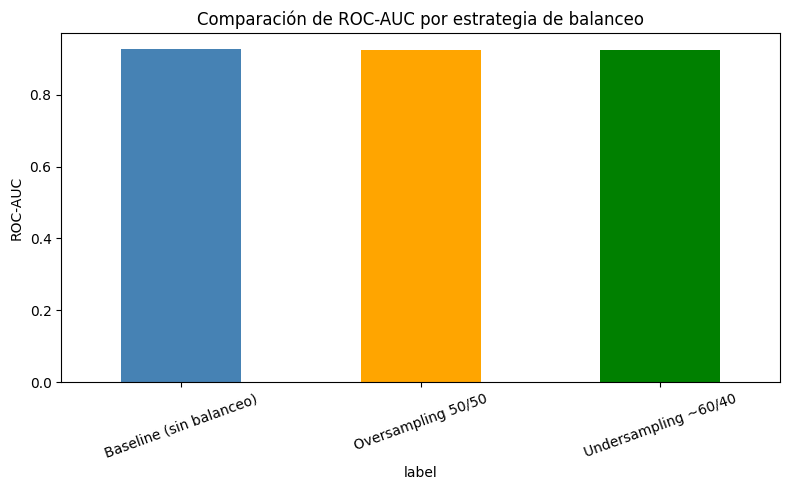

In [ ]:
plt.figure(figsize=(8,5))
summary["roc_auc"].plot(kind="bar", color=["steelblue", "orange", "green"])
plt.title("Comparación de ROC-AUC por estrategia de balanceo")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

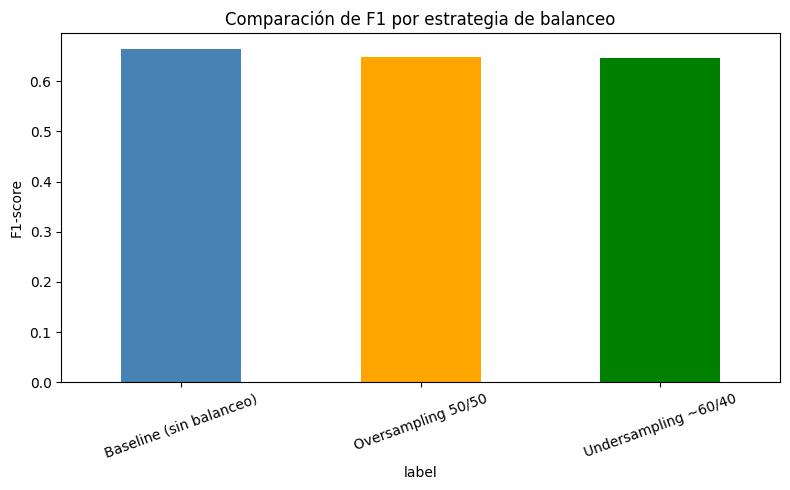

In [ ]:
plt.figure(figsize=(8,5))
summary["f1"].plot(kind="bar", color=["steelblue", "orange", "green"])
plt.title("Comparación de F1 por estrategia de balanceo")
plt.ylabel("F1-score")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Elegimos mantener el modelo sin balanceo (Baseline).

Justificación:
Tiene el mejor F1-score (0.6635) balance óptimo entre detectar compradores y evitar falsos positivos.

Su recall sigue siendo alto (0.7356) no estamos perdiendo demasiados compradores.

No hay necesidad de balancear artificialmente porque:

El modelo ya maneja bien el desbalance.

El tuning con RandomizedSearchCV ya ajustó bien los hiperparámetros.

El balanceo no mejoró los resultados; incluso los empeoró levemente.

## Conclusion final
Conclusiones del Proyecto

Selección del dataset final

Luego de comparar los cinco conjuntos de datos (set_a a set_e), el dataset elegido fue set_d, que elimina las columnas:

* Administrative
* Informational
* ProductRelated
* Browser
* TrafficType
* Region
* ExitRates

Justificación:

* set_d obtuvo uno de los mejores F1-score (0.6635) y ROC AUC (0.9254) con Random Forest Tuned, igualando o superando a los otros sets más grandes.
* Al tener menos variables irrelevantes, el modelo es más simple y generaliza mejor.

Selección del modelo

Se evaluaron tres modelos:

* Random Forest Base (sin tuning)
* Random Forest Tuned (con RandomizedSearchCV)
* Logistic Regression

**Decisión:**
El modelo final elegido es Random Forest Tuned por:

* Mejor F1-score y recall, métricas clave para detectar compradores reales en un dataset desbalanceado.
* Excelente ROC AUC (0.925), mostrando alta capacidad discriminativa.
* Logistic Regression tuvo recall muy bajo (~0.32) y F1 pobre, por lo que fue descartado.

Balanceo de la variable target

La variable Revenue estaba desbalanceada (~84% clase 0 vs. 16% clase 1). Se probaron tres estrategias:

1. Baseline (sin balancear)
2. Oversampling 50/50 (duplicar la clase minoritaria en el train)
3. Undersampling \~60/40 (recortar la clase mayoritaria en el train)

Decisión:
Se eligió Baseline (sin balanceo) porque:

* Obtiene el mejor F1-score (0.66) y el ROC AUC más alto (0.925).
* Mantiene un recall elevado (0.74) sin sacrificar tanta precisión.
* Los métodos de balanceo no mejoraron las métricas generales y aumentaron los falsos positivos.

¿El modelo final elegido es bueno?

Sí. Tiene:

* Alto F1-score (0.66) y recall (0.74), métricas adecuadas para un problema con clases desbalanceadas.
* El ROC AUC (0.925) indica muy buena capacidad de separación entre compradores y no compradores.
* El modelo es interpretable y robusto.

¿Existe overfitting o underfitting?

No se observa overfitting significativo.

* El modelo fue evaluado en un test set estratificado, manteniendo métricas muy similares a las de validación cruzada.
* Se redujo el riesgo al:

  * Usar Random Forest (modelo robusto)
  * Eliminar columnas irrelevantes (menos ruido)
  * Aplicar tuning de hiperparámetros con RandomizedSearchCV

Tampoco hay underfitting, ya que el ROC AUC y F1 son altos y la complejidad del modelo es suficiente para capturar los patrones de los datos.

Importancia de variables clave

Las variables más influyentes en la predicción de compra son:

1. PageValues
2. ProductRelated\_Duration
3. BounceRates
4. Month
5. VisitorType

Respuesta final

El modelo final es Random Forest Tuned (set_d) sin aplicar técnicas de balanceo adicionales.
Este enfoque logra el mejor equilibrio entre precisión y recall, maximizando el F1 y el ROC AUC. Además, es estable, interpretable y generaliza bien.